In [16]:
import tensorflow as tf ##impor TF
import timeit
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import tensorflow_datasets as tfds
import seaborn as sns

In [2]:
#!pip install tensorflow_datasets

In [3]:
def eager_function(x):
  result = 2*x**2 + 3*x + 5
  #print(result)
  return result

In [4]:
x = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])

In [5]:
eager_function(x)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([10., 19., 32., 49., 70.], dtype=float32)>

In [6]:
print("Eager time:", timeit.timeit(lambda: eager_function(x), number=500))

Eager time: 0.1422418430011021


In [7]:
tf.compat.v1.disable_eager_execution()
tf.compat.v1.reset_default_graph() 

In [8]:
x = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])
m = tf.constant([2.0])
y = tf.constant([3.0])
z = tf.constant([5.0])

In [9]:
pow_op = tf.pow(x, m, name='potencia')
mul_op = tf.multiply(pow_op, m, name='Multiplx2')
mul_op2 = tf.multiply(x, y, name='Multiplx3')
add_op = tf.add(mul_op2, mul_op, name='sumar')
poli_op = tf.add(z, add_op, name='polinomio')

In [10]:
with tf.compat.v1.Session() as sess:
    writer = tf.compat.v1.summary.FileWriter('./graphs', sess.graph)
    orden_sup, anw = sess.run([pow_op, poli_op])
    print(anw)
    

[10. 19. 32. 49. 70.]


In [ ]:
%load_ext tensorboard
%tensorboard --logdir="graphs/" 

Launching TensorBoard...

In [ ]:
@tf.function
def eager_function(x):
  result = 2*x**2 + 3*x + 5
  print(result)
  return result

In [ ]:
graph_function = tf.function(eager_function)

In [ ]:
print("Graph time:", timeit.timeit(lambda: graph_function(x), number=500))

In [ ]:
## tensores

In [ ]:
scalar = tf.constant(4,dtype=tf.int32,name='Const')

In [ ]:
scalar

In [ ]:
vector = tf.constant([2.0, 3.0, 4.0], dtype=tf.float64)

In [ ]:
vector

In [ ]:
matriz = tf.constant([[1, 2],
                      [3, 4],
                      [5, 6]], dtype=tf.float32)

In [ ]:
matriz

In [ ]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

In [ ]:
rank_3_tensor

In [ ]:
print(rank_3_tensor[:, :, 4])

In [ ]:
print(rank_3_tensor[1, :, :])

In [ ]:
a = tf.constant([[1, 2],
                 [3, 4]])
a

In [ ]:
b = tf.ones([2,2],dtype=tf.int32) 
b

In [ ]:
print("suma:",tf.add(a, b), "\n")

In [ ]:
print("suma:",a + b, "\n")

In [ ]:
print("multip. elementwise:",tf.multiply(a, b), "\n")

In [ ]:
print("multip. elementwise:",a * b, "\n")

In [ ]:
print("multip. matriz",tf.matmul(a, b), "\n")

In [ ]:
print("multip. matriz",a @ b, "\n")

In [ ]:
c = tf.constant([[4, 5], [10, 1]],tf.int32) 
c

In [ ]:
d= c+b
d

In [ ]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]],tf.float64)
c

In [ ]:
print(tf.reduce_max(c))

In [ ]:
print(tf.reduce_mean(c))

In [ ]:
print(tf.argmax(c))

In [ ]:
print(tf.acosh(c))

In [ ]:
tf.rank(c)

In [ ]:
d= tf.random.uniform(shape=[200],minval=-10., maxval=10.)

In [ ]:
e= tf.nn.relu(d).numpy()

In [ ]:
plt.plot(tf.nn.relu(d).numpy())
plt.plot(tf.nn.relu(e).numpy())

In [ ]:
## broadcasting

In [ ]:
x = tf.constant([1, 2, 3])

In [ ]:
y = tf.constant(3)
z = tf.constant([3, 3, 3])

In [ ]:
tf.multiply(x,z)

In [ ]:
a = tf.constant([[1., 2.], [3., 4.]])
b = tf.constant([[1.], [2.]])

In [ ]:
c= a+ b

In [ ]:
d = tf.tile(b, [1,2])

In [ ]:
d+a

In [ ]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9] ]

In [ ]:
tf.constant(ragged_list)

In [ ]:
ragged_tensor=tf.ragged.constant(ragged_list)

In [ ]:
ragged_tensor

In [ ]:
tensor_strings = tf.constant(["Bienvenidos", 
                                "al",
                                 "curso de:",
                                 "TensorFlow 2",
                                 "para Deep Learning",
                              "🥳👍"])

In [ ]:
tensor_strings

In [ ]:
tf.strings.lower(tensor_strings)

In [ ]:
tf.strings.ngrams(tensor_strings,2)

In [ ]:
num_buckets=50
word_buckets = tf.strings.to_hash_bucket(tensor_strings, num_buckets)

In [ ]:
word_buckets

In [ ]:
ids=tf.constant([0])
word_embeddings = tf.nn.embedding_lookup(word_buckets,ids)

In [ ]:
word_embeddings

In [ ]:
###Variables

In [ ]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])

In [ ]:
my_tensor

In [ ]:
my_variable=tf.Variable(my_tensor)

In [ ]:
my_variable

In [ ]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

In [ ]:
bool_variable = tf.Variable([False, False, False, True], name="Boolean")

In [ ]:
print("Shape: ", bool_variable.shape)
print("DType: ", bool_variable.dtype)
print("As NumPy: ", bool_variable.numpy())

In [ ]:
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

In [ ]:
print("Shape: ", complex_variable.shape)
print("DType: ", complex_variable.dtype)
print("As NumPy: ", complex_variable.numpy())

In [ ]:
my_variable

In [ ]:
my_variable.assign_sub([[11.0, 11.0], [4.0, 7.0]])

In [ ]:
my_variable.assign([1.0, 2.0, 3.0])

In [ ]:
##Gradientes

In [ ]:
x = tf.Variable(3.0)

In [ ]:
with tf.GradientTape() as tape:
    y =x**2
dy_dx = tape.gradient(y,x)

In [ ]:
dy_dx

In [ ]:
trainable = tf.Variable(1., trainable=True, name='x_trainable')
no_trainable = tf.Variable(1., trainable=False, name='x_untrainable')

In [ ]:
with tf.GradientTape(persistent=True) as tape:
    x1 = trainable * 2.
    x2 = no_trainable *2.

In [ ]:
dx2_tr=tape.gradient(x2, no_trainable)

In [ ]:
[var.name for var in tape.watched_variables()]

In [ ]:
w = tf.Variable(tf.random.normal((2, 3)), name='w')
b = tf.Variable(tf.zeros(3, dtype=tf.float32), name='b')
x = [[1., 2.]]

In [ ]:
with tf.GradientTape(persistent=True) as tape:
    y= x @ w + b
    loss = tf.reduce_mean(y) 
[dl_dw, dl_db] = tape.gradient(loss,[w,b])

In [ ]:
my_vars = {
    'w': w,
    'b': b
}

In [ ]:
grad = tape.gradient(loss, my_vars)

In [ ]:
grad

In [ ]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

In [ ]:
my_dict={'x0': x0, 'x1': x1}

In [ ]:
with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x1)
    y0 = tf.math.sin(x0)
    y1 = tf.nn.softplus(x1)
    y = y0 + y1
    ys = tf.reduce_sum(y)
grad = tape.gradient(ys, my_dict)
    
    

In [ ]:
grad['x1']

# Construir pipelines en TensorFlow

- tf.data.Dataset.from_tensors()
- tf.data.Dataset.from_tensor_slices()

In [ ]:
### tipo numpy

In [ ]:

array_examp =np.array(range(70)).reshape(7,10)
lista_examp = array_examp.tolist()
print(array_examp)

In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(lista_examp)
dataset2 = tf.data.Dataset.from_tensors(array_examp)

In [ ]:
dataset1

In [ ]:
dataset2.element_spec

In [ ]:
tensor1 = tf.ones([10,2,2])
tensor2 = tf.ones([10,1])
tensor3 = tf.ones([9,2,2])*2

In [ ]:
dataset3 = tf.data.Dataset.from_tensors((tensor1, tensor3))

In [ ]:
dataset3

In [ ]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(lista_examp)

In [ ]:
for ds in dataset1.as_numpy_iterator():
    print(ds)

In [ ]:
data HD -> data[2]ram <-> data[2]vram +[DAG]

In [ ]:
def dense_1_step(x):
  return tf.multiply(x,1)

In [ ]:
dataset4 = dataset1.map(dense_1_step,num_parallel_calls=tf.data.AUTOTUNE).shuffle(1).batch(3).repeat(1).prefetch(tf.data.AUTOTUNE).enumerate(0)


for ds in dataset4.as_numpy_iterator():
    print(ds)

In [ ]:
### datos csv

In [ ]:
pandas_dataframe = pd.read_csv('/home/javier/Bienvenidos-al-curso-/Sunspots.csv')

In [ ]:
pandas_dataframe.head()

In [ ]:
pandas_dataframe.columns

In [ ]:
pandas_dataframe.rename(columns={'Unnamed: 0':'int'})

In [ ]:
dataframe_dict = dict(pandas_dataframe)

In [ ]:
pandas_dataset = tf.data.Dataset.from_tensor_slices(dataframe_dict)

In [ ]:
pandas_dataset

In [ ]:
csv_dataset = tf.data.experimental.make_csv_dataset('/home/javier/Bienvenidos-al-curso-/Sunspots.csv',
                                                    batch_size=3,
                                                    label_name='Monthly Mean Total Sunspot Number', select_columns=[1,2])

In [ ]:
csv_dataset

In [ ]:
def extract_time(x,y):
    date_ = datetime.fromisoformat(x.numpy()[0].decode("utf-8"))
    year =date_.year
    month =date_.month
    day =date_.day

    return year,month, day, y
    

In [ ]:
csv_dataset_map =csv_dataset.map(lambda x, y: tf.py_function(extract_time, [x['Date'],y] , [tf.int32,tf.int32,tf.int32, tf.float32] ))

In [ ]:
csv_dataset_map

In [ ]:
##Imagenes

In [ ]:
batch_size = 4
img_height = 224
img_width = 224

ds_image= tf.keras.utils.image_dataset_from_directory(
   '/home/javier/Downloads/val/images/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123)

In [ ]:
class_names = ds_image.class_names
print(class_names)

In [ ]:
 for image, labels in ds_image.as_numpy_iterator():
        print(image.shape, labels)

In [ ]:
ds_image

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_image.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
ds_image_train= tf.keras.utils.image_dataset_from_directory(
   '/home/javier/Downloads/val/images/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training')

ds_image_validation= tf.keras.utils.image_dataset_from_directory(
   '/home/javier/Downloads/val/images/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
   validation_split=0.2,
    subset='validation')

In [ ]:
for img, lab in ds_image_train.as_numpy_iterator():
    print(lab)

In [ ]:
for img, lab in ds_image_validation.as_numpy_iterator():
    print(lab)

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    name = 'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)

In [ ]:
ds_test

In [ ]:
fig = tfds.show_examples(ds_train, ds_info)

In [ ]:
def normalize_img(image,label ):
  return tf.cast(image, tf.float32) / 255., tf.one_hot(label,depth=10)


def data_load(data_ds,augmented=normalize_img,shuffle_=True ,batch_=5):
    
    data_ds = data_ds.map(
        augmented, num_parallel_calls=tf.data.AUTOTUNE)
    data_ds = data_ds.cache()
    if shuffle_:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

In [ ]:
ds_train_postprop= data_load(ds_train,normalize_img,shuffle_=True, batch_=3)

In [ ]:
ds_test_postprop= data_load(ds_test,normalize_img,shuffle_=False, batch_=3)

In [ ]:
plt.figure(figsize=(3, 3))
i=0
for ds,lb in ds_train_postprop.take(4):
    print(ds.shape,lb)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(np.squeeze(ds[0].numpy()))
    index = tf.argmax(lb, axis=1)
    plt.title('{}'.format(index[0].numpy()))
    plt.axis("off")
    i+=1

In [ ]:
def augment_data(images, labels):
    images = tf.image.random_flip_left_right(images)
    images = tf.image.random_flip_up_down(images)
    images = tf.image.rot90(images)
    return images,  tf.one_hot(labels,depth=10)

In [ ]:
ds_train_augm= data_load(ds_train,augment_data,shuffle_=True, batch_=3)

In [ ]:
plt.figure(figsize=(3, 3))
i=0
for ds,lb in ds_train_augm.take(4):
    print(ds.shape,lb)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(np.squeeze(ds[0].numpy()))
    index = tf.argmax(lb, axis=1)
    plt.title('{}'.format(index[0].numpy()))
    plt.axis("off")
    i+=1

In [ ]:
##MEtodo 2 preproces. CPU tf.sequence

In [ ]:
tf.keras.backend.clear_session()
from tensorflow.keras import layers, Sequential
trainAug = Sequential([
   layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.Rescaling(scale=1.0 / 255)
    
],name="trainAug")
layer_onehot = layers.CategoryEncoding(
          num_tokens=10, output_mode="one_hot")

In [ ]:
def data_load_sequential(data_ds,shuffle_train=True ,batch_=5):
    data_ds = data_ds.map(
        lambda x, y: (trainAug(x,shuffle_train),layer_onehot(y)), num_parallel_calls=tf.data.AUTOTUNE)
    data_ds = data_ds.cache()
    if shuffle_train:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

data_train_sq = data_load_sequential(ds_train)
data_test_sq = data_load_sequential(ds_test,shuffle_train=False)

In [ ]:
data_train

In [ ]:
plt.figure(figsize=(3, 3))
i=0
for ds,lb in data_train_sq.take(4):
    print(ds.shape,lb)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(np.squeeze(ds[0].numpy()))
    shaped=ds[0].numpy().shape
    index = tf.argmax(lb, axis=1)
    plt.title('{}'.format(index[0].numpy()))
    plt.axis("off")
    i+=1

In [ ]:
#metodo 3. GPU

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(shaped),batch_size=None))
model.add(trainAug)
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

# Pipeline Texto

In [ ]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [ ]:
train_data

In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(5)))
print(train_examples_batch,train_labels_batch)

In [ ]:
def tf_lower_and_split_punct(text):

  text = tf.strings.lower(text)
  text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  text = tf.strings.strip(text)
  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

In [ ]:
def data_load_txt(data_ds,shuffle_=True ,batch_=12):
    data_ds = data_ds.cache()
    if shuffle_:
        data_ds = data_ds.shuffle(2)
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

In [ ]:
BATCH=32
data_train = data_load_txt(train_data,batch_=BATCH)
data_test = data_load_txt(test_data,shuffle_=False,batch_=BATCH)
data_val = data_load_txt(validation_data,shuffle_=False,batch_=BATCH)

In [ ]:
data_train

In [ ]:
for idx in data_train.take(1):
    print(idx[0])

In [ ]:
max_vocab_size = 10000

In [ ]:
input_text_processor = tf.keras.layers.TextVectorization(standardize=tf_lower_and_split_punct, max_tokens=max_vocab_size)

In [ ]:
reviews_only_ds = data_train.map(lambda a, b: a) 
input_text_processor.adapt(reviews_only_ds)

In [ ]:
input_text_processor.get_vocabulary()[:10]

In [ ]:
for idx in data_train.take(1):
    example_tokens = input_text_processor(idx[0])
    print(idx[1],example_tokens)


In [ ]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens)
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens != 0)
plt.title('Mask')

In [ ]:
from tensorflow.keras.layers import Embedding,Dense
from tensorflow.keras import Sequential

vocab_size = 10000
embedding_dim=16

model = Sequential([
input_text_processor,
  Embedding(input_dim = vocab_size, 
            output_dim = embedding_dim, 
            name="embedding"),
   Dense(1)])
model.summary()

Funcion F: X---> F(X)= Yp

Tareas supervisadas (X,Y) -> regresion(Y pertenece Re)
                          -> clasificacion(Y pertenece variables discretas)
---------------------
X   Y
2   4     F(2)->Yp~4
4   8     F(4)->Yp~8
5   10
6   12
7   14


   Yp~Y  ---> funcion de costo (Loss)   Loss grande->> modelo no funciona
                                        Loss pequeno->> modelo funciona  
 






















## REGRESION LINEAL: Y(x)=w*x+b

In [ ]:
##Generacion de datos
numbers= 300
x = tf.linspace(-10.0, 10.0,numbers )
inter_true=tf.constant(2.3)
pendi_true=tf.constant(5.5)
noise = tf.random.normal(
    (numbers,), mean=0.001, stddev=1.9, dtype=tf.dtypes.float32)
y = pendi_true*x+inter_true+noise
plt.scatter(x,y,marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend
dict_={'x':x,'y':y}
df =pd.DataFrame(dict_)
df.head()

In [ ]:
pandas_dataset = tf.data.Dataset.from_tensor_slices((df['x'].values,df['y'].values))
len_df =pandas_dataset.cardinality().numpy()
print(len_df)

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,batch_=30):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        ds = ds.shuffle(len_df, seed=12)
    
    train_size = int(train_split * len_df)
    val_size = int(val_split * len_df)
    
    train_ds = ds.take(train_size).batch(batch_).prefetch(tf.data.AUTOTUNE)
    val_ds = ds.skip(train_size).take(val_size).batch(batch_).prefetch(tf.data.AUTOTUNE)
    test_ds = ds.skip(train_size).skip(val_size).batch(batch_).prefetch(tf.data.AUTOTUNE)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_data,val_data, test_data = get_dataset_partitions_tf(pandas_dataset, train_split=0.7, val_split=0.15, test_split=0.15)

## Entrenamiento

In [ ]:
w = tf.Variable(np.random.normal(), name='w')
b = tf.Variable(np.random.normal(), name='b')

In [ ]:
def loss_mse(y_pred,y):
    return tf.reduce_mean(tf.square(y_pred-y))

In [ ]:
def output_(w,b,x,activation=tf.keras.activations.linear):
    y_pred = tf.add(tf.multiply(w, x), b)
    return  activation(y_pred)

In [ ]:
learning_rate=0.01
Epocas=100
loss_hist = []
loss_hist_val = []
loss_batch =[]

for st in range(Epocas):
    for dsx, dsy  in train_data:
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch([w,b])
            y_pred = output_(w,b,dsx)
            loss = loss_mse(y_pred,dsy)
        dl_dw,dl_db = tape.gradient(loss, [w,b])
        w = w -learning_rate *dl_dw
        b = b - learning_rate * dl_db 
        ##vis.
        loss_batch.append(loss.numpy())
    loss_v=[]
    for dsx_val,dsy_val in val_data:
        y_pred_val = output_(w,b,dsx_val)
        loss_batch_val = loss_mse(y_pred_val,dsy_val)
        loss_v.append(loss_batch_val.numpy())
        
    loss_val =np.mean(loss_v)
    loss_epoc = np.mean(loss_batch)
    loss_hist.append(loss_epoc)
    loss_hist_val.append(loss_val)
    if st%10==0:
        print('epoch: {}; loss_mse_train: {}; loss_mse_validation: {};  w: {}; b: {}'.format(st,loss_epoc,loss_val,w,b))
        

    
    
    


In [ ]:

plt.plot(loss_hist,label='train')
plt.plot(loss_hist_val,label='val')
plt.title('Grafica de funcion de costo VS Epocas')
plt.legend()

In [ ]:
loss_t=[]
x_test=[]
y_test=[]
for dsx_test,dsy_test in test_data:
        y_pred_test = output_(w,b,dsx_test)
        loss_batch_test = loss_mse(y_pred_test,dsy_test)
        loss_t.append(loss_batch_test.numpy())
        x_test.append(dsx_test.numpy())
        y_test.append(dsy_test.numpy())
loss_test =np.mean(loss_t)
print("Funcion de costo para datos prueba:",loss_test)

In [ ]:
# Prediccion de la regresion!
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)
plt.scatter(x_test,y_test,marker='.', label='datos')
plt.plot(x_test,x_test*w+b,color='red', label='prediccion')
plt.legend()

## Entrenamiento Sequential

In [ ]:
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model = tf.keras.Sequential()
model.add(tf.keras.Input((1,)))
model.add(Dense(1))

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(
    model,
    rankdir= 'LR',#"TB",
    to_file="model.png",
    show_shapes=True,
    show_layer_activations=False)

In [ ]:
sgd= SGD(learning_rate)

In [ ]:
model.compile(loss='mse', optimizer=sgd, metrics='mse')

In [ ]:
history= model.fit(train_data,validation_data=val_data, epochs=100,verbose=2)

In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

## Clasificacion:  $-[y_{true}*ln(y_{pred}) + (1 − y_{true} )*ln( 1 − y_{pred})]$ Cross-entropy

In [ ]:
data_x = tf.random.uniform(
    (5000,2), minval=-10, maxval=10,seed=42, dtype=tf.float64).numpy()
def label_circle(x,y):
    if  1*np.sqrt(10)<x**2+y**2<= 5*np.sqrt(10):
        return  1
    elif  20*np.sqrt(10)>=x**2+y**2>= 10*np.sqrt(10):
        return 0
    else:
        return 2
def squared_circle(x,y):
    return x**2, y**2
    
df =pd.DataFrame(data_x,columns=['x0','x1'])
df['y'] =df.apply(lambda x: label_circle(x['x0'],x['x1']), axis=1)
df[['x02','x12']] =df.apply(lambda x: squared_circle(x['x0'],x['x1']), axis=1, result_type="expand")
df=df[df['y']!=2]
df.plot.scatter(x='x0',y='x1', c='y',colormap='viridis')

In [ ]:
df.head()

In [ ]:
def preprocess(x,y):
    return tf.cast(x,tf.float64),tf.cast(y,tf.float64)
#dataset= tf.data.Dataset.from_tensor_slices((df[['x0','x1']].values,df[['y']].values))
pandas_dataset_X = tf.data.Dataset.from_tensor_slices(df[['x0','x1']].values)
pandas_dataset_y = tf.data.Dataset.from_tensor_slices(df['y'].values)
dataset = tf.data.Dataset.zip((pandas_dataset_X,pandas_dataset_y))
len_df =dataset.cardinality().numpy()
dataset=dataset.shuffle(len_df)
dataset=dataset = dataset.map(
        preprocess, num_parallel_calls=tf.data.AUTOTUNE)
print(len_df,dataset.element_spec)

In [ ]:
BATCH=50
train_data_class,val_data_class, test_data_class = get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1,batch_=BATCH)

In [ ]:
##DEfinicion de variables
w = tf.Variable(np.random.normal(size=(2, 1)), name='w',dtype=tf.float64)
b = tf.Variable(np.random.normal(size=(1)), name='b',dtype=tf.float64)

In [ ]:
w

In [ ]:
def cross_entropy_loss(y_pred, y_true):
    #y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    #return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred+1e-9)+(1. - y_true) * tf.math.log(1.-y_pred+1e-9)))/len(y_pred)
    cce = tf.keras.losses.BinaryCrossentropy()
    return cce(y_pred, y_true)

In [ ]:
def output_(w,b,x,activation=tf.nn.sigmoid):
    y_pred = tf.add(tf.matmul(tf.cast(tf.math.pow(x,2),tf.float64),w), b)
    return  activation(y_pred)
    

In [ ]:
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

In [ ]:
Epocas=200
loss_hist = []
loss_hist_val = []
loss_batch =[]
acc_batch =[]
learning_rate=0.001

for st in range(Epocas): ## loop de epocas
    for dsX, dsy  in train_data_class: ## loop de datos
        ##calculo de gradiente
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch([w,b])
            ##salida de red    
            y_pred = output_(w,b,dsX)
            ##calculo de la funcion de costo
            loss = cross_entropy_loss(y_pred,dsy)
            ##calculo de accuracy
            acc =  accuracy(y_pred, dsy)
        ## calculo de gradientes de w ,b
        dl_dw,dl_db = tape.gradient(loss, [w,b])
        
        ##actualizar w, b
        w = w - learning_rate * dl_dw
        b = b - learning_rate * dl_db    
        loss_batch.append(loss.numpy())
        acc_batch.append(acc.numpy())
    loss_v=[]

    for ds_valX,ds_valy in val_data_class: ##loop de validacion
        y_pred_val = output_(w,b,ds_valX)
        loss_batch_val = cross_entropy_loss(y_pred_val, ds_valy)
        acc =  accuracy(y_pred_val, ds_valy)
        
        loss_v.append(loss_batch_val.numpy())
    loss_val =np.mean(loss_v)
    
    loss_epoc = np.mean(loss_batch)
    acc_epoc = np.mean(acc_batch)
    loss_hist.append(loss_epoc)
    loss_hist_val.append(loss_val)
    
    
    
    if st%10==0:
        print('epoch: {}; loss_ce_train: {}; loss_ce_validation: {}; acc_train: {}; w: {}; b: {}'.format(st,loss_epoc,loss_val,acc_epoc,w,b))

In [ ]:
## accuracy test
y_pred_bath=[]
y_true=[]
x_true=[]
for ds_tesx,ds_tesy in test_data_class:
    y_pred=output_(w,b,ds_tesx)
    y_pred_bath.append(y_pred.numpy())
    y_true.append(ds_tesy.numpy())
    x_true.append(ds_tesx.numpy())
print('accuracy test: {}'.format(accuracy(np.concatenate(y_pred_bath), np.concatenate(y_true))))

In [ ]:
arry= np.stack((np.concatenate(x_true)[:,0],np.concatenate(x_true)[:,1],np.concatenate(y_pred_bath)[:,0]),axis=1)
df1= pd.DataFrame(arry,columns=['a','b','c'])
df1.plot.scatter(x='a',y='b', c='c',colormap='viridis')

In [ ]:
from tensorflow.keras.layers import Dense,  Activation
from tensorflow.keras.optimizers import SGD

In [ ]:
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

#----------------------------------------
model = tf.keras.Sequential()
model.add(tf.keras.Input((2,)))
model.add(tf.keras.layers.Lambda(lambda x: x ** 2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
#-----------------------------------









sgd = SGD(lr=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,metrics=['accuracy'])
history=model.fit(train_data_class, validation_data=val_data_class ,epochs=400,verbose=1)

In [ ]:
model.summary()

In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()

## Multilayer perceptron: tf.keras.layers.Dense. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer



In [ ]:
# DEFINICION
# tf.keras.layers.Dense(
#     units, activation=None, use_bias=True,
#     kernel_initializer='glorot_uniform',
#     bias_initializer='zeros', kernel_regularizer=None,
#     bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,name='')
# 

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
layer1 = Dense(units=2, activation="relu", name="layer1")
layer2 = Dense(3, activation="sigmoid", name="layer2")
layer3 = Dense(4, name="layer3")

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
##listas
model =Sequential([
Dense(units=2, activation="relu", name="layer1"),
Dense(3, activation="sigmoid", name="layer2"),
Dense(4, name="layer3")
])

In [ ]:
#add
model= Sequential()
model.add(Dense(units=2, activation="relu", name="layer1"))
model.add(Dense(units=3, activation="sigmoid", name="layer2"))
model.add(Dense(units=4,  name="layer3"))


In [ ]:
x = tf.ones((2, 3))
x

In [ ]:
y= model(x)
y
## base de datos (supervisados)
#  x(features)  y (label)
#   3           1.2
#   4.5         3.5
#   7.3         5.3

In [ ]:
model.layers[1].weights

In [ ]:
model.summary()

In [ ]:
initial_model = Sequential([
    #tf.keras.Input(shape=(28,28,1)),#opcion1
    #tf.keras.layers.InputLayer(input_shape=(3,3)), ##opcion2
    Dense(units=2, activation="relu", name="layer1", input_shape=(3,3)),
    Dense(3, activation="sigmoid", name="layer2"),
    Dense(4, name="layer3")
])

In [ ]:
initial_model.summary()

In [ ]:
initial_model.trainable_variables

In [ ]:
for layer in initial_model.layers:
    print(layer.trainable)

In [ ]:
initial_model.trainable=True

In [ ]:
initial_model.trainable

In [ ]:
for layer in initial_model.layers:
    print(layer.trainable)

In [ ]:
initial_model.summary()

In [ ]:
initial_model.trainable_variables

In [ ]:
model = Sequential()
model.add(tf.keras.Input(shape=(3,3)))
model.add(Dense(2, activation="relu", name="layer1"))
model.add(Dense(3, activation="sigmoid", name="layer2"))
model.add(Dense(4, activation="relu", name="layer3"))
model.add(Dense(5, activation="relu", name="layer4"))
model.add(Dense(6, activation="sigmoid", name="layer5"))
model.add(Dense(7, activation="relu", name="layer6"))
model.summary()

In [ ]:
#"Functional API"

In [ ]:
model_function=tf.keras.Model(inputs= model.input , outputs=model.layers[3].output)

In [ ]:
model_function.summary()

In [ ]:
tf.keras.utils.plot_model(
    model_function,
    rankdir= 'TB',#"TB",
    to_file="model.png",
    show_shapes=True,
    show_layer_activations=False)

In [ ]:
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(32, 32, 3), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
block_1_output = layers.Dense(64, activation='relu')(x)

x = layers.Dense(32, activation='relu')(block_1_output)
x =  layers.Dense(64, activation='relu')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Dense(32, activation='relu')(block_2_output)
x = layers.Dense(64, activation='relu')(x)
block_3_output = layers.add([x, block_2_output])

x =  layers.Dense(16, activation='relu')(block_3_output)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='very_densee')

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
###Clase Layer
class Mylayer(tf.keras.layers.Layer):

  def __init__(self, units=1):
      super(Mylayer, self).__init__()
      self.units = units

  def build(self, input_shape):  
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(
        initial_value=w_init(shape=(input_shape[-1], self.units),
                             dtype='float32'),
        trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(
        initial_value=b_init(shape=(self.units,), dtype='float32'),
        trainable=True)

  def call(self, inputs):  
      return tf.matmul(inputs, self.w) + self.b


In [ ]:
my_dense=Mylayer(8)

In [ ]:
x=tf.ones((1, 2))
x

In [ ]:
my_dense(x)

In [ ]:
###Clase MODEL
class MyModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    self.dense1 = layers.Dense(2, 'relu')
    self.dense2 = layers.Dense(4, 'relu')
    self.dense3 = layers.Dense(8, 'elu')

  def call(self, inputs, training=False):
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.dense3(x)
    if not training:
      self.dense3.trainable = False 
    return x


In [ ]:
model = MyModel()

In [ ]:
y = model(tf.ones((1, 2))*2,training=False)
print('resultado:',y)
model.summary()

In [ ]:
(ds_train_mnist, ds_test_mnist), ds_info_mnist = tfds.load(
    name = 'mnist',
    split=['train[:30%]', 'test[:30%]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)
fig = tfds.show_examples(ds_train_mnist, ds_info_mnist)


In [ ]:
def one_hot(dx,dy):
    return dx, tf.one_hot(dy, 10)
def data_load_sequential(data_ds,shuffle_train=True ,batch_=15):
    data_ds=data_ds.map(one_hot)
    data_ds = data_ds.cache()
    if shuffle_train:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

data_train_mnist = data_load_sequential(ds_train_mnist)
data_test_mnist = data_load_sequential(ds_test_mnist,shuffle_train=False)
for ds,lb in data_train_mnist.take(1):
    print(ds.shape,lb)
shaped_mnist=ds[0].numpy().shape

In [ ]:
trainprocess = Sequential([                
        layers.Flatten()
    ],name='preprocess')

In [ ]:
trainprocess(ds)

In [ ]:

tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=shaped_mnist))
model.add(trainprocess)
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [ ]:
model.summary()

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics='accuracy')

In [ ]:
history=model.fit(data_train_mnist,validation_data=data_test_mnist, epochs=3,verbose=1)

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'])
plt.legend()

In [ ]:
np.argmax(model.predict(data_test_mnist)[0])

In [ ]:
for ds, lb in data_test_mnist.take(1):
    print(ds,lb)

In [ ]:
plt.imshow(np.squeeze(ds[0].numpy()))

In [ ]:


try:
  my_variable.assign([1.0, 2.0, 3.0])
except Exception as e:
  print(f"{type(e).__name__}: {e}")



In [ ]:


my_second_variable = tf.Variable(my_variable)
print(my_second_variable)



In [ ]:
my_variable.assign([[22.0, 33.0], [13.3, 17.0]]) 
print(my_variable)

In [ ]:


print(my_second_variable)

my_second_variable.get_shape()

In [ ]:


v = tf.Variable(0.)
print(v)
read_and_decrement = tf.function(lambda: v.assign_sub(0.1))
for _ in range(4):
  print(read_and_decrement()) 



In [ ]:


v.read_value()



In [ ]:


v = tf.Variable([1, 2, 3, 4, 5, 6, 7, 8])
indices = tf.constant([[4], [3], [1] ,[7]])
updates = tf.constant([9, 10, 11, 12])
v.scatter_nd_update(indices, updates)
print(v)



value_3 = tf.convert_to_tensor(np.array([[1.0, 2.0], [3.0, 4.0]], dtype=np.float32))
print(value_3)



In [ ]:
trainable = tf.Variable(1.,name='x_trainable')
non_trainable = tf.Variable(2., trainable=False,name='x_No_trainable')
with tf.GradientTape(persistent=True) as tape:
  x1 = trainable * 2.
  x2 = non_trainable * 2.

In [ ]:
tape.gradient(x1, trainable)

In [ ]:
tape.gradient(x1, trainable)

In [ ]:
tape.gradient(x2, non_trainable) 

In [ ]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

In [ ]:
with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [ ]:
print(w.shape)
print(dl_dw.shape)
print(dl_db)

In [ ]:


my_vars = {
    'w': w,
    'b': b
}
grad = tape.gradient(loss, my_vars)
print(grad['b'])
[var.name for var in tape.watched_variables()]

In [ ]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
  tape.watch([x1,x0])
  y0 = tf.math.sin(x0)
  y1 = tf.nn.softplus(x1)
  y = y0 + y1
  ys = tf.reduce_sum(y)

grad = tape.gradient(ys, {'x0': x0, 'x1': x1})
print('dy/dx0:', grad['x0'])
print('dy/dx1:', grad['x1'].numpy())


In [ ]:


x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)
    
dy_dx = tape.gradient(y, x)
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')



In [ ]:
[var.name for var in tape.watched_variables()]

In [ ]:
array_examp =np.array(range(70)).reshape(7,10)
array_examp1 =np.array(range(70,140)).reshape(7,10)
lista_examp = array_examp.tolist()
print(array_examp.shape)



In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(array_examp)
dataset2 = tf.data.Dataset.from_tensors(array_examp)
dataset_lista_1 = tf.data.Dataset.from_tensor_slices(lista_examp)
dataset_lista_2 = tf.data.Dataset.from_tensors(lista_examp)


In [ ]:


print(dataset1.element_spec)
print(dataset2.element_spec)
print(dataset_lista_1.element_spec)
print(dataset_lista_2.element_spec)



In [ ]:
dataset3 = tf.data.Dataset.from_tensor_slices((array_examp1,array_examp1),name='dataset3')
print(dataset3.element_spec)

In [ ]:
tensor1 = tf.ones([10,2,2],name='tensor1')
tensor2 = tf.ones([10,1],name='tensor2')
tensor3 = 2*tf.ones([9,2,2])



In [ ]:
tensor3

In [ ]:


dataset4 = tf.data.Dataset.from_tensor_slices((tensor1, tensor2),name='dataset4')

print(dataset4.element_spec)

In [ ]:
dataset5 = tf.data.Dataset.from_tensor_slices((tensor1, tensor3),name='dataset4')

In [ ]:


dataset5 = tf.data.Dataset.from_tensors((tensor1, tensor2))
dataset5

In [ ]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset1))

In [ ]:
dataset3

In [ ]:
def sep(x):
    return x/69

In [ ]:
dataset_enu = dataset1.map(sep).batch(1,drop_remainder=False).enumerate(start=0)

In [ ]:
for element in dataset_enu.as_numpy_iterator():
  print(element)

In [ ]:
with open('/home/javier/Bienvenidos-al-curso-/sonnets.txt', 'r', encoding='utf-8') as file:
    text_string = file.read().replace('\n', ' ')
text_string[:500]



In [ ]:
dataset_text = tf.data.TextLineDataset("sonnets.txt")

In [ ]:
dataset_text

In [ ]:
dataset_text_set = tf.data.Dataset.list_files("/home/javier/Bienvenidos-al-curso-/*.txt")

In [ ]:
dataset_text_set

In [ ]:
import pandas as pd
pandas_dataframe = pd.read_csv('/home/javier/Bienvenidos-al-curso-/Sunspots.csv')

dataframe_dict = dict(pandas_dataframe)
pandas_dataframe.head()

In [ ]:
pandas_dataset = tf.data.Dataset.from_tensor_slices((pandas_dataframe['Date'].values,pandas_dataframe['Monthly Mean Total Sunspot Number'].values))
pandas_dataset.element_spec

In [ ]:
pandas_dataframe.values

In [ ]:


csv_dataset = tf.data.experimental.make_csv_dataset('/home/javier/Bienvenidos-al-curso-/Sunspots.csv',
                                                    batch_size=2, num_epochs=1,shuffle=False, select_columns=[1,2],
                                                    label_name='Monthly Mean Total Sunspot Number').take(1)
#csv_dataset.element_spec



In [ ]:
for element in csv_dataset.as_numpy_iterator():
   print(element)

In [ ]:
csv_dataset

In [ ]:
element[1]

In [ ]:
def extract_time(x,label):
    date_ = datetime.fromisoformat(x.numpy()[0].decode("utf-8"))
    year =date_.year
    month =date_.month
    day =date_.day
    return day, year, month, label


data_map=csv_dataset.map(lambda x,z: tf.py_function(extract_time, [x['Date'],z], [tf.int32,tf.int32,tf.int32,tf.float32]))

In [ ]:
data_map

In [ ]:
for element in data_map.as_numpy_iterator():
   print(element)

In [ ]:
for element in series_dataset.as_numpy_iterator():
   print(element)

In [ ]:
ss=tf.keras.utils.timeseries_dataset_from_array(
    pandas_dataframe['Monthly Mean Total Sunspot Number'].values,
    targets=None,
    sequence_length=4,
    sequence_stride=1,
    sampling_rate=2,
    batch_size=3,
    shuffle=False).take(1)


In [ ]:
for element in ss.as_numpy_iterator():
   print(element)

In [ ]:
import seaborn as sns
data=pd.read_csv('/home/javier/Downloads/archive/creditcard.csv')

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
columns=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Class']

In [ ]:
df=data.copy()

In [ ]:
sns.pairplot(data[columns].sample(100), hue="Class")

In [ ]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [ ]:
data_x = tf.random.uniform(
    (5000,2), minval=-10, maxval=10,seed=42, dtype=tf.float64).numpy()
def label_circle(x,y):
    if  1*np.sqrt(10)<x**2+y**2<= 5*np.sqrt(10):
        return  1
    elif  20*np.sqrt(10)>=x**2+y**2>= 10*np.sqrt(10):
        return 0
    else:
        return 2
def squared_circle(x,y):
    return x**2, y**2
    
df =pd.DataFrame(data_x,columns=['x0','x1'])
df['y'] =df.apply(lambda x: label_circle(x['x0'],x['x1']), axis=1)
df[['x02','x12']] =df.apply(lambda x: squared_circle(x['x0'],x['x1']), axis=1, result_type="expand")
df=df[df['y']!=2]
df.plot.scatter(x='x0',y='x1', c='y',colormap='viridis')


In [ ]:
def preprocess(x,y):
    return tf.cast(x,tf.float64),tf.cast(y,tf.float64)
pandas_dataset_X = tf.data.Dataset.from_tensor_slices(df[['x0','x1']].values)
pandas_dataset_y = tf.data.Dataset.from_tensor_slices(df['y'].values)
dataset = tf.data.Dataset.zip((pandas_dataset_X,pandas_dataset_y))
len_df =dataset.cardinality().numpy()
dataset=dataset.shuffle(len_df)
dataset=dataset = dataset.map(
        preprocess, num_parallel_calls=tf.data.AUTOTUNE)

print(len_df,dataset.element_spec)

In [ ]:
BATCH=50
train_data_class,val_data_class, test_data_class = get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1,batch_=BATCH)


In [ ]:
train_data_class

In [ ]:
##DEfinicion de variables
w = tf.Variable(np.random.normal(size=(2, 1)), name='w',dtype=tf.float64)
b = tf.Variable(np.random.normal(size=(1)), name='b',dtype=tf.float64)


##Salida de red neuronal (prediccion y_pred)
def output_(w,b,x,activation=tf.nn.sigmoid):
    y_pred = tf.add(tf.matmul(tf.cast(tf.math.pow(x,2),tf.float64),w), b)
    return  activation(y_pred)

## Calculo de funcion de costo, clasificacion=>cross entropy
def cross_entropy_loss(y_pred, y_true):
    ### Cross entropy
    #y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    #return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred+1e-9)+(1. - y_true) * tf.math.log(1.-y_pred+1e-9)))/len(y_pred)
    ### Cross entropy usado por keras
    cce = tf.keras.losses.BinaryCrossentropy()
    return cce(y_true,y_pred)
##Definicion de exactitud
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float64))


In [ ]:
Epocas=100
loss_hist = []
loss_hist_val = []
loss_batch =[]
acc_batch =[]
learning_rate=0.001

for st in range(Epocas): ## loop de epocas
    for dsX, dsy  in train_data_class: ## loop de datos
        ##calculo de gradiente
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch([w,b])
            ##salida de red    
            y_pred = output_(w,b,dsX)
            ##calculo de la funcion de costo
            loss = cross_entropy_loss(y_pred,dsy)
            ##calculo de accuracy
            acc =  accuracy(y_pred, dsy)
        ## calculo de gradientes de w ,b
        dl_dw,dl_db = tape.gradient(loss, [w,b])
        
        ##actualizar w, b
        w = w - learning_rate * dl_dw
        b = b - learning_rate * dl_db    
        loss_batch.append(loss.numpy())
        acc_batch.append(acc.numpy())
    loss_v=[]

    for ds_valX,ds_valy in val_data_class: ##loop de validacion
        y_pred_val = output_(w,b,ds_valX)
        loss_batch_val = cross_entropy_loss(y_pred_val, ds_valy)
        acc =  accuracy(y_pred_val, ds_valy)
        
        loss_v.append(loss_batch_val.numpy())
    loss_val =np.mean(loss_v)
    
    loss_epoc = np.mean(loss_batch)
    acc_epoc = np.mean(acc_batch)
    loss_hist.append(loss_epoc)
    loss_hist_val.append(loss_val)
    
    
    
    if st%10==0:
        print('epoch: {}; loss_mse_train: {}; loss_mse_validation: {}; acc_train: {}; w: {}; b: {}'.format(st,loss_epoc,loss_val,acc_epoc,w,b))


In [ ]:


## accuracy test
y_pred_bath=[]
y_true=[]
x_true=[]
for ds_tesx,ds_tesy in test_data_class:
    y_pred=output_(w,b,ds_tesx)
    y_pred_bath.append(y_pred.numpy())
    y_true.append(ds_tesy.numpy())
    x_true.append(ds_tesx.numpy())
print('accuracy test: {}'.format(accuracy(np.concatenate(y_pred_bath), np.concatenate(y_true))))



In [ ]:
arry= np.stack((np.concatenate(x_true)[:,0],np.concatenate(x_true)[:,1],np.concatenate(y_pred_bath)[:,0]),axis=1)
df1= pd.DataFrame(arry,columns=['a','b','c'])
df1.plot.scatter(x='a',y='b', c='c',colormap='viridis')

In [ ]:
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
model = tf.keras.Sequential()
model.add(tf.keras.Input((2,)))
model.add(tf.keras.layers.Lambda(lambda x: x ** 2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
sgd = SGD(lr=0.01)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,metrics=['accuracy'])
history=model.fit(train_data_class, validation_data=val_data_class ,epochs=10,verbose=1)



In [ ]:
model.summary()

In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()

In [ ]:


from tensorflow.keras.layers import Dense
layer1 = Dense(2, activation="relu", name="layer1")
layer2 = Dense(3, activation="sigmoid", name="layer2")
layer3 = Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))
y



In [ ]:
# DEFINICION
# tf.keras.layers.Dense(
#     kernel_initializer='glorot_uniform',
#     bias_initializer='zeros', kernel_regularizer=None,
#     bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,name='')
# 
model = tf.keras.Sequential(
    [
        Dense(2, activation="relu", name="layer1"),
        Dense(3, activation="sigmoid", name="layer2"),
        Dense(4, name="layer3"),
    ],name='my_first_model'
)

x = tf.ones((3, 3))
y = model(x)
y

In [ ]:
model.layers

In [ ]:
model.layers[2].weights

In [ ]:
model.summary()

In [ ]:
## Input layer
initial_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(3, 3)), ##1
        #tf.keras.layers.InputLayer(input_shape=(3,3)), ##2
        #Dense(2, activation="relu", input_shape=(3,3), name="layer1"), ##3
        Dense(2, activation="relu", name="layer1"),
        Dense(3, activation="sigmoid", name="layer2"),
        Dense(4, name="layer3")
    ]
)
initial_model.summary()



In [ ]:
initial_model.input

In [ ]:
initial_model.output

In [ ]:


model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(3,3)))
model.add(Dense(2, activation="relu"))
model.add(Dense(3, activation="sigmoid"))
model.add(Dense(4, activation="relu"))

model.summary()



In [ ]:
model.trainable_variables

In [ ]:
for layer in model.layers:
  print(layer.trainable)

In [ ]:
model.trainable = False
model.trainable_variables

In [ ]:
for layer in model.layers:
  print(layer.trainable)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(3,3)))
model.add(Dense(2, activation="relu", name="layer1"))
model.add(Dense(3, activation="sigmoid", name="layer2"))
model.add(Dense(4, activation="relu", name="layer3"))
model.add(Dense(5, activation="relu", name="layer4"))
model.add(Dense(6, activation="sigmoid", name="layer5"))
model.add(Dense(7, activation="relu", name="layer6"))
model.summary()

In [ ]:
#"Functional API"
feature_extractor = tf.keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="layer4").output,name='model_intermediate'
)
feature_extractor

In [ ]:
feature_extractor.summary()

In [ ]:
tf.keras.utils.plot_model(
    model,
    rankdir= 'LR',#"TB",
    to_file="model.png",
    show_shapes=True,
    show_layer_activations=False)

In [ ]:
#"Functional API"
inputs = tf.keras.Input(shape=(784,), name='datos')
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='model')
model.summary()

In [ ]:
from tensorflow.keras import layers
inputs = tf.keras.Input(shape=(32, 32, 3), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
block_1_output = layers.Dense(64, activation='relu')(x)

x = layers.Dense(32, activation='relu')(block_1_output)
x =  layers.Dense(64, activation='relu')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Dense(32, activation='relu')(block_2_output)
x = layers.Dense(64, activation='relu')(x)
block_3_output = layers.add([x, block_2_output])

x =  layers.Dense(16, activation='relu')(block_3_output)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='very_densee')
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:


###Clase MODEL
class MyModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    self.dense1 = layers.Dense(2, 'relu')
    self.dense2 = layers.Dense(4, 'relu')
    self.dense3 = layers.Dense(8, 'elu')

  def call(self, inputs, training=False):
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.dense3(x)
    if not training:
      self.dense3.trainable = False 
    return x

model = MyModel()

y = model(tf.ones((1, 2))*2,training=False)
print('resultado:',y)
model.summary()



In [ ]:
class Mylayer(tf.keras.layers.Layer):

  def __init__(self, units=1):
      super(Mylayer, self).__init__()
      self.units = units

  def build(self, input_shape):  
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(
        initial_value=w_init(shape=(input_shape[-1], self.units),
                             dtype='float32'),
        trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(
        initial_value=b_init(shape=(self.units,), dtype='float32'),
        trainable=True)

  def call(self, inputs):  
      return tf.matmul(inputs, self.w) + self.b


linear_layer = Mylayer(8)


y = linear_layer(tf.ones((1, 2)))
y

In [ ]:


import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding,Dense
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score
import pandas as pd
print(tf.__version__)


In [ ]:
inputs = tf.constant([x for x in range(-10, 20)],tf.float64)
inputs

In [ ]:
plt.plot(inputs,tf.keras.activations.relu(inputs),label='relu')
plt.plot(inputs,tf.keras.activations.softplus(inputs),label='softplus')
plt.legend()

In [ ]:
plt.plot(inputs,tf.keras.activations.tanh(inputs),label='tanh')
plt.plot(inputs,tf.keras.activations.linear(inputs),label='lineal')
plt.legend()

In [ ]:
plt.plot(inputs,tf.keras.activations.elu(inputs),label='elu')
plt.plot(inputs,tf.keras.activations.selu(inputs),label='selu')
plt.legend()

In [ ]:
plt.plot(inputs,tf.keras.activations.sigmoid(inputs),label='sigmoid')
plt.plot(inputs,tf.keras.activations.hard_sigmoid(inputs),label='hard_sigmoid')
plt.plot(inputs,tf.keras.activations.softsign(inputs),label='softsign')
plt.legend()

In [ ]:
z = tf.Variable(np.array([[1,1.2,1.8,2],[3,4.2,5.8,9]]), dtype = tf.float32)
tf.keras.activations.softmax(z, axis = 1)

In [ ]:


N = 200
xs = np.array(sorted(np.random.uniform(size=N, low=-np.pi, high=np.pi)))
ys = np.sin(xs) + np.random.normal(loc=0, scale=0.05, size=N)
plt.figure()
plt.scatter(xs, ys)

In [ ]:
(ds_train_mnist, ds_test_mnist), ds_info_mnist = tfds.load(
    name = 'mnist',
    split=['train[:30%]', 'test[:60%]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)
fig = tfds.show_examples(ds_train_mnist, ds_info_mnist)

In [ ]:
def one_hot(dx,dy):
    return dx, dy#tf.one_hot(dy, 10)
def data_load_sequential(data_ds,shuffle_train=True ,batch_=15):
    data_ds=data_ds.map(one_hot)
    data_ds = data_ds.cache()
    if shuffle_train:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

data_train_mnist = data_load_sequential(ds_train_mnist)
data_test_mnist = data_load_sequential(ds_test_mnist,shuffle_train=False)
for ds,lb in data_train_mnist.take(1):
    print(ds.shape,lb)
shaped_mnist=ds[0].numpy().shape

In [ ]:
trainprocess = Sequential([                
        #layers.Rescaling(scale=1.0 / 255),
        layers.Flatten()
    ],name='preprocess')

In [ ]:
trainprocess(ds)

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=shaped_mnist))
model.add(trainprocess)
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),#'CategoricalCrossentropy',
              optimizer='adam',metrics=['accuracy'])

history=model.fit(data_train_mnist,validation_data=data_test_mnist, epochs=2,verbose=1)

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'])
plt.legend()

In [ ]:
np.argmax(model.predict(data_test_mnist)[7])

In [ ]:
for img, label in data_test_mnist.take(1):
    print(img.shape)

In [ ]:
one_image=img[7:8]
plt.imshow(np.squeeze(one_image[0]))


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2,monitor="val_loss", mode="min"),
    tf.keras.callbacks.ModelCheckpoint(filepath='carpeta_resultados/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='carpeta_resultados/logs', histogram_freq=1),
]
history=model.fit(data_train_mnist, epochs=3, validation_data=data_test_mnist, callbacks=my_callbacks)

In [ ]:
%load_ext tensorboard
%tensorboard  --logdir carpeta_resultados/logs

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'])
plt.legend()

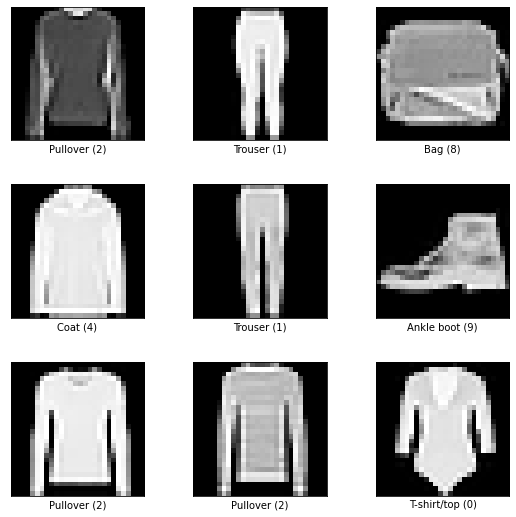

In [2]:
(ds_train_mnist,ds_val_mnist, ds_test_mnist), ds_info_mnist = tfds.load(
    name = 'fashion_mnist',
    split=['train[:40%]','train[40%:45%]', 'test[:60%]'],
    as_supervised=True,
    with_info=True)
fig = tfds.show_examples(ds_train_mnist, ds_info_mnist)

In [3]:
def one_hot(dx,dy):
    return dx, tf.one_hot(dy, 10)
def data_load_sequential(data_ds,shuffle_train=True ,batch_=16):
    data_ds=data_ds.map(one_hot)
    data_ds = data_ds.cache()
    if shuffle_train:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

data_train_mnist = data_load_sequential(ds_train_mnist)
data_val_mnist = data_load_sequential(ds_val_mnist,shuffle_train=False)
data_test_mnist = data_load_sequential(ds_test_mnist,shuffle_train=False)
for ds,lb in data_train_mnist.take(1):
    print(ds.shape,lb)
shaped_mnist=ds[0].numpy().shape
trainprocess = tf.keras.Sequential([                
        tf.keras.layers.Rescaling(scale=1.0 / 255),
        tf.keras.layers.Flatten()
    ],name='preprocess')

(16, 28, 28, 1) tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(16, 10), dtype=float32)


In [4]:
from tensorflow.keras import layers
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=shaped_mnist))
model.add(trainprocess)
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='CategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
history=model.fit(data_train_mnist,validation_data=data_val_mnist, epochs=10,verbose=1)

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'])
plt.legend()

In [ ]:
model.predict(data_test_mnist)

In [ ]:
model.evaluate(data_test_mnist)

In [14]:
directorio='clase6/'


In [ ]:
from keras.models import load_model
model.save(directorio+'modelo_clase_6.h5')

In [ ]:
del model  

In [ ]:
model=load_model(directorio+'modelo_clase_6.h5')

In [ ]:
model.summary()

In [ ]:
model.evaluate(data_test_mnist)

In [ ]:
model.save_weights(directorio+'tf_saved_model_weights')

In [ ]:
model_cloned=tf.keras.models.clone_model(model)

In [ ]:
model_cloned.summary()

In [ ]:
model_cloned.compile(loss='CategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
model_cloned.evaluate(data_test_mnist)

In [ ]:
model_cloned.load_weights(directorio+'tf_saved_model_weights')

In [ ]:
model_cloned.evaluate(data_test_mnist)

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5,monitor="val_loss", mode="min"),
    tf.keras.callbacks.ModelCheckpoint(filepath=directorio+'model_saved_callback',
                                       monitor  = "val_loss",
                                        verbose = 1,
                                        save_best_only = True,
                                        save_weights_only = False,
                                        mode = "min",
                                        save_freq="epoch"),
    tf.keras.callbacks.TensorBoard(log_dir=directorio+'logs', histogram_freq=1),
]

In [ ]:
model_cloned.fit(data_train_mnist, epochs=10, validation_data=data_test_mnist, callbacks=my_callbacks,verbose=1)

In [ ]:
model_load_callback=load_model(directorio+'model_saved_callback')

In [ ]:
model_load_callback.evaluate(data_test_mnist)

In [ ]:
%load_ext tensorboard
%tensorboard  --logdir clase6/logs

In [6]:
model_tuner=tf.keras.models.clone_model(model)

In [7]:
model_tuner.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_tuner.compile(loss='CategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

In [9]:
model_tuner.evaluate(data_test_mnist)

375/375 [==============================] - 1s 2ms/step - loss: 2.3103 - accuracy: 0.1620


[2.310343027114868, 0.16200000047683716]

In [13]:
#!pip install -q -U keras-tuner
import keras_tuner as kt

In [17]:
def hp_model(hp):
    units=hp.Int("units", min_value=256, max_value=512, step=32)
    activation=hp.Choice("activation", values=["relu", "elu"])
    lr=hp.Choice("lr",  values=[1e-2, 1e-3, 1e-4])
    dropout= hp.Boolean("dropout")
    
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=shaped_mnist))
    model.add(trainprocess)
    model.add(layers.Dense(units=units,activation=activation))
    if dropout:
        model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10,activation='softmax'))
    model.compile(loss='CategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),metrics=['accuracy'])
    return model

In [18]:
#RandomSearch, BayesianOptimization and Hyperband, Sklearn
tuner = kt.Hyperband(hp_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory=directorio+'kt_dir',
                     project_name='kt_hyperband')

In [19]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 256, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu'], 'ordered': False}
lr (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
dropout (Boolean)
{'default': False, 'conditions': []}


In [20]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [21]:
tuner.search(data_train_mnist, epochs=10, validation_data=data_test_mnist, callbacks=[stop_early],verbose=1)

Trial 30 Complete [00h 00m 58s]
val_accuracy: 0.8586666584014893

Best val_accuracy So Far: 0.8738333582878113
Total elapsed time: 00h 10m 32s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [23]:
parameters= tuner.get_best_hyperparameters()[0]

In [24]:
parameters.get("units")

352

In [28]:
parameters.values

{'units': 352,
 'activation': 'relu',
 'lr': 0.001,
 'dropout': False,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0014'}

In [2]:
import tensorflow as tf ##impor TF
import timeit
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import tensorflow_datasets as tfds

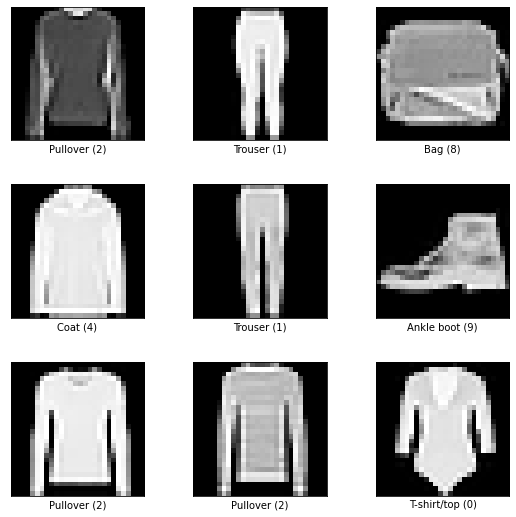

In [3]:
(ds_train_mnist,ds_val_mnist, ds_test_mnist), ds_info_mnist = tfds.load(
    name = 'fashion_mnist',
    split=['train[:40%]','train[40%:45%]', 'test[:60%]'],
    as_supervised=True,
    with_info=True)
fig = tfds.show_examples(ds_train_mnist, ds_info_mnist)

In [4]:
def one_hot(dx,dy):
    return dx, tf.one_hot(dy, 10)
def data_load_sequential(data_ds,shuffle_train=True ,batch_=16):
    data_ds=data_ds.map(one_hot)
    data_ds = data_ds.cache()
    if shuffle_train:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

data_train_mnist = data_load_sequential(ds_train_mnist)
data_val_mnist = data_load_sequential(ds_val_mnist,shuffle_train=False)
data_test_mnist = data_load_sequential(ds_test_mnist,shuffle_train=False)
for ds,lb in data_train_mnist.take(1):
    print(ds.shape,lb)
shaped_mnist=ds[0].numpy().shape
trainprocess = tf.keras.Sequential([                
        tf.keras.layers.Rescaling(scale=1.0 / 255),
        tf.keras.layers.Flatten()
    ],name='preprocess')

(16, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(16, 10), dtype=float32)


In [38]:
from tensorflow.keras import layers
tf.keras.backend.clear_session()

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=shaped_mnist))
model.add(trainprocess)
model.add(layers.Dense(480,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='CategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

In [41]:
history=model.fit(data_train_mnist,validation_data=data_val_mnist, epochs=20,verbose=1)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7900 - accuracy: 0.7282 - val_loss: 0.5695 - val_accuracy: 0.7990
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6531 - accuracy: 0.7715 - val_loss: 0.5301 - val_accuracy: 0.8243
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6239 - accuracy: 0.7828 - val_loss: 0.5331 - val_accuracy: 0.8207
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6314 - accuracy: 0.7840 - val_loss: 0.5412 - val_accuracy: 0.8193
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6035 - accuracy: 0.7918 - val_loss: 0.6228 - val_accuracy: 0.8000
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5891 - accuracy: 0.7950 - val_loss: 0.5313 - val_accuracy: 0.8363
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5816 - accuracy: 0.7993 - val_loss: 0.6047 - val_accuracy:

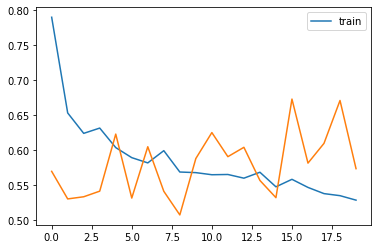

In [42]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'])
plt.legend()

In [13]:
model.predict(data_test_mnist)[0]

375/375 [==============================] - 1s 2ms/step


array([2.3293029e-07, 1.2030374e-08, 3.8019571e-02, 6.9682412e-03,
       9.0779227e-01, 7.5575832e-19, 4.7216371e-02, 6.9958773e-30,
       3.3301681e-06, 7.6191074e-16], dtype=float32)

In [14]:
model.evaluate(data_test_mnist)

375/375 [==============================] - 1s 2ms/step - loss: 0.5646 - accuracy: 0.8245


[0.5646058320999146, 0.8245000243186951]

In [16]:
directorio='clase7/'

In [18]:
model.save(directorio+'modelo_clase7.h5')

In [27]:
from tensorflow.keras.models import load_model

In [28]:
model=load_model(directorio+'modelo_clase7.h5')

In [29]:
model.evaluate(data_test_mnist)

375/375 [==============================] - 1s 2ms/step - loss: 0.5646 - accuracy: 0.8245


[0.5646058320999146, 0.8245000243186951]

In [30]:
model.save_weights(directorio+'modelo_clase7_weight')

In [31]:
model_cloned=tf.keras.models.clone_model(model)

In [33]:
model_cloned.compile(loss='CategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

In [34]:
model_cloned.evaluate(data_test_mnist)

375/375 [==============================] - 1s 2ms/step - loss: 2.3047 - accuracy: 0.1260


[2.3047001361846924, 0.12600000202655792]

In [35]:
model_cloned.load_weights(directorio+'modelo_clase7_weight')

In [36]:
model_cloned.evaluate(data_test_mnist)

375/375 [==============================] - 1s 2ms/step - loss: 0.5646 - accuracy: 0.8245


[0.5646058320999146, 0.8245000243186951]

In [50]:
my_callbacks = [
     tf.keras.callbacks.EarlyStopping(patience=4,monitor="val_loss", mode="min"),
        tf.keras.callbacks.ModelCheckpoint(filepath=directorio+'model_saved_callback',
                                        monitor  = "val_loss",
                                        verbose = 1,
                                        save_best_only = True,
                                        save_weights_only = False,
                                        mode = "min",
                                        save_freq="epoch"),
    tf.keras.callbacks.TensorBoard(log_dir=directorio+'logs', histogram_freq=1),
    
]

In [51]:
history=model.fit(data_train_mnist,validation_data=data_val_mnist, epochs=20,verbose=1,callbacks=my_callbacks)

Epoch 1/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.8138
Epoch 1: val_loss improved from inf to 0.71590, saving model to clase7/model_saved_callback
INFO:tensorflow:Assets written to: clase7/model_saved_callback/assets


INFO:tensorflow:Assets written to: clase7/model_saved_callback/assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.5312 - accuracy: 0.8138 - val_loss: 0.7159 - val_accuracy: 0.8280
Epoch 2/20
1487/1500 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.8118
Epoch 2: val_loss improved from 0.71590 to 0.69990, saving model to clase7/model_saved_callback
INFO:tensorflow:Assets written to: clase7/model_saved_callback/assets


INFO:tensorflow:Assets written to: clase7/model_saved_callback/assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.5392 - accuracy: 0.8120 - val_loss: 0.6999 - val_accuracy: 0.8510
Epoch 3/20
1486/1500 [============================>.] - ETA: 0s - loss: 0.5263 - accuracy: 0.8199
Epoch 3: val_loss did not improve from 0.69990
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5261 - accuracy: 0.8200 - val_loss: 0.8744 - val_accuracy: 0.8303
Epoch 4/20
1490/1500 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.8161
Epoch 4: val_loss did not improve from 0.69990
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5334 - accuracy: 0.8160 - val_loss: 0.7634 - val_accuracy: 0.8240
Epoch 5/20
1490/1500 [============================>.] - ETA: 0s - loss: 0.5023 - accuracy: 0.8238
Epoch 5: val_loss did not improve from 0.69990
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5022 - accuracy: 0.8240 - val_loss: 0.7605 - val_accuracy: 0.8307
Epoch 6/20
1499/1500 [===========

INFO:tensorflow:Assets written to: clase7/model_saved_callback/assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.5245 - accuracy: 0.8194 - val_loss: 0.6924 - val_accuracy: 0.8350
Epoch 7/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.5250 - accuracy: 0.8207
Epoch 7: val_loss did not improve from 0.69239
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5247 - accuracy: 0.8208 - val_loss: 0.7467 - val_accuracy: 0.8383
Epoch 8/20
1493/1500 [============================>.] - ETA: 0s - loss: 0.5163 - accuracy: 0.8246
Epoch 8: val_loss did not improve from 0.69239
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5159 - accuracy: 0.8246 - val_loss: 0.7587 - val_accuracy: 0.8217
Epoch 9/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.5131 - accuracy: 0.8212
Epoch 9: val_loss did not improve from 0.69239
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5129 - accuracy: 0.8212 - val_loss: 0.8497 - val_accuracy: 0.8223
Epoch 10/20
1498/1500 [==========

In [48]:
model_load_callback=load_model(directorio+'model_saved_callback')

In [52]:
%load_ext tensorboard
%tensorboard  --logdir clase7/logs

In [63]:
#!pip install -q -U keras-tuner
import keras_tuner as kt

In [64]:
def hp_model(hp):
    units=hp.Int("units", min_value=256,max_value=512,step=32)
    activation=hp.Choice("activation", values=["relu", "elu"])
    dropout= hp.Boolean("dropout")
    lr=hp.Choice("lr",  values=[1e-2, 1e-3, 1e-4])
    
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=shaped_mnist))
    model.add(trainprocess)
    model.add(layers.Dense(units=units,activation=activation))
    if dropout:
        model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10,activation='softmax'))
    model.compile(loss='CategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),metrics=['accuracy'])
    return model
    
    

In [69]:
#RandomSearch, BayesianOptimization and Hyperband, Sklearn
turner= kt.Hyperband(
    hp_model,
    objective='val_loss',
    max_epochs=10,
    factor=10, #log_factor(1+max_epoch)
    directory=directorio+'kt_dir',
    project_name='kt_hyperband_clase7'

)

In [70]:
turner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 256, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [72]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [73]:
turner.search(data_train_mnist, epochs=10, validation_data=data_test_mnist, callbacks=[stop_early],verbose=1)

Trial 30 Complete [00h 01m 23s]
val_loss: 0.4072350561618805

Best val_loss So Far: 0.36897680163383484
Total elapsed time: 00h 14m 50s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [74]:
parameters= turner.get_best_hyperparameters()[0]

In [75]:
parameters.values

{'units': 480,
 'activation': 'relu',
 'dropout': False,
 'lr': 0.0001,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [76]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding,Dense
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score
import pandas as pd
import keras
from keras import backend as K
print(tf.__version__)

2.9.1


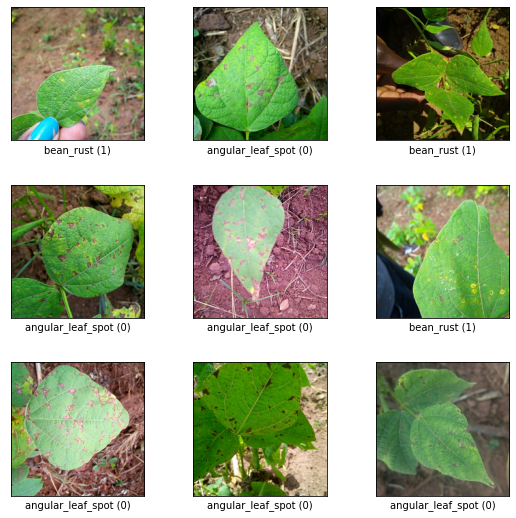

In [94]:
(ds_train_, ds_val_, ds_test_,), ds_info = tfds.load(
    name = 'beans',
    split=['train[:30%]', 'validation[:30%]','test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)
fig = tfds.show_examples(ds_train_, ds_info)

In [95]:


def augment_data(images, labels):
    images = tf.image.random_flip_left_right(images)
    images = tf.image.rot90(images)
    images = tf.image.random_brightness(images, 0.2)
    images = tf.image.random_contrast(images, 0.5, 2.0)
    images = tf.image.random_saturation(images, 0.75, 1.25)
    return tf.cast(images, tf.float32) / 255., labels



In [96]:
def data_load(data_ds,augmented=augment_data,shuffle_=True ,batch_=5):
    data_ds = data_ds.map(
        augmented, num_parallel_calls=tf.data.AUTOTUNE)
    data_ds = data_ds.cache()
    if shuffle_:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

In [97]:


data_train = data_load(ds_train_)
data_test = data_load(ds_test_,shuffle_=False)
for ds,lb in data_train.take(1):
    shaped=list(ds.shape)



In [98]:
label_names = ds_info.features['label'].names
num_classes = len(label_names)

model = Sequential([
  layers.Conv2D(3,16,activation='relu', input_shape=(shaped[1:])),
  layers.Conv2D(3,32,activation='relu'),
  layers.MaxPool2D(2),  
  layers.Conv2D(3,32,activation='relu'),
    layers.Conv2D(3,32,activation='relu'),
    layers.MaxPool2D(2),  
    layers.Conv2D(3,32,activation='relu'),
    layers.Conv2D(3,32,activation='relu'),
    layers.MaxPool2D(2),  
  layers.Flatten(),   
  ##completar codigo
  layers.Dense(num_classes,activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 485, 485, 3)       2307      
                                                                 
 conv2d_13 (Conv2D)          (None, 454, 454, 3)       9219      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 227, 227, 3)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 196, 196, 3)       9219      
                                                                 
 conv2d_15 (Conv2D)          (None, 165, 165, 3)       9219      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 82, 82, 3)        0         
 2D)                                                  

In [99]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [100]:
history=model.fit(data_train,validation_data=data_test, epochs=20,verbose=1)

Epoch 1/20
 7/62 [==>...........................] - ETA: 17:14 - loss: 4.4993 - accuracy: 0.2571

KeyboardInterrupt: 

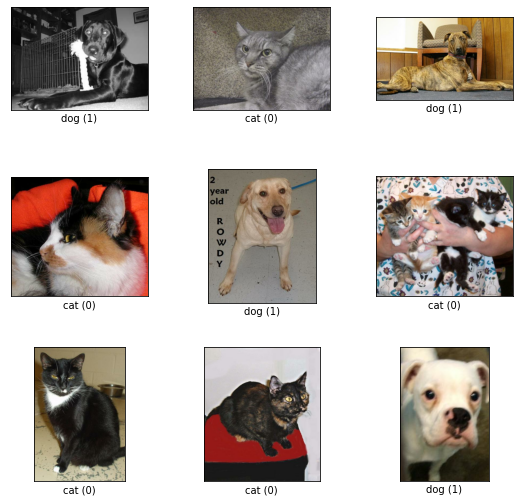

In [3]:
(ds_train_mnist, ds_test_mnist), ds_info = tfds.load(
    name = 'cats_vs_dogs',
    split=['train[:20%]', 'train[20%:30%]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)
fig = tfds.show_examples(ds_train_mnist, ds_info)


In [4]:


label_names = ds_info.features['label'].names



In [5]:
def augment_data(images, labels):
    images = tf.image.resize(images,(128,128))
    images = tf.image.random_flip_left_right(images)
    images = tf.image.rot90(images)
    images = tf.image.random_brightness(images, 0.2)
    images = tf.image.random_contrast(images, 0.5, 2.0)
    images = tf.image.random_saturation(images, 0.75, 1.25)
    return tf.cast(images, tf.float32) / 255., labels

def data_load(data_ds,augmented=augment_data,shuffle_=True ,batch_=5):
    data_ds = data_ds.map(
        augmented, num_parallel_calls=tf.data.AUTOTUNE)
    data_ds = data_ds.cache()
    if shuffle_:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds


In [6]:


data_train = data_load(ds_train_mnist)
data_test = data_load(ds_test_mnist,shuffle_=False)
for ds,lb in data_train.take(1):
    shaped=list(ds.shape)



In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=shaped[1:]),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(2,activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 3,145,922
Trainable params: 3,145,922
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [9]:


early_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode="min")
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min' ,factor=0.4,
                              patience=5, min_lr=1e-7,verbose=1)
def scheduler(epoch, lr):
      if epoch%10 != 0:
        return lr
      else:
        return lr * tf.math.exp(-0.1)
callback_Scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)



callbacks=[early_callback,callback_Scheduler]

In [10]:
history= model.fit(
    data_train,
    epochs=6,
    validation_data=data_test,
    callbacks=callbacks,
    verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 1/6
931/931 [==============================] - 15s 15ms/step - loss: 0.7979 - accuracy: 0.5060 - val_loss: 0.6930 - val_accuracy: 0.5088 - lr: 9.0484e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 2/6
931/931 [==============================] - 14s 15ms/step - loss: 0.6933 - accuracy: 0.4966 - val_loss: 0.6930 - val_accuracy: 0.5088 - lr: 9.0484e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 3/6
931/931 [==============================] - 13s 14ms/step - loss: 0.6933 - accuracy: 0.4959 - val_loss: 0.6930 - val_accuracy: 0.5088 - lr: 9.0484e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 4/6
931/931 [==============================] - 14s 15ms/step - loss: 0.6933 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5088 - lr: 9.0484e-04

Epoch 5: LearningRateScheduler setting 

In [11]:

model.evaluate(data_test)


466/466 [==============================] - 2s 3ms/step - loss: 0.6930 - accuracy: 0.5088


[0.6930196285247803, 0.5088096261024475]

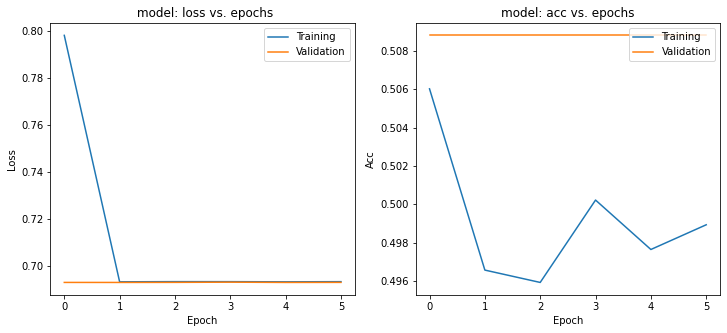

In [12]:
fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(' model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model: acc vs. epochs')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

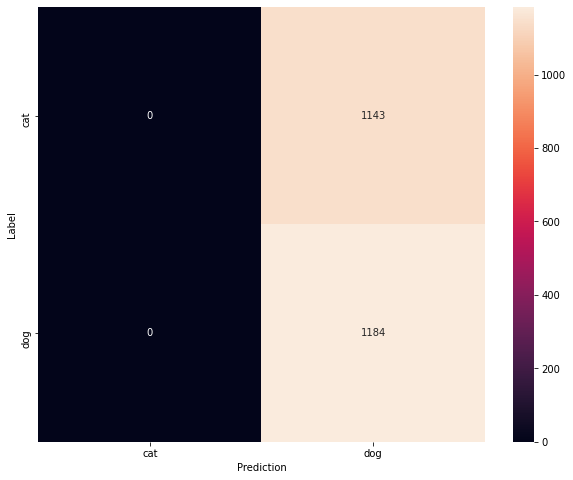

In [17]:


def show_confusion_matrix(cm, labels):
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, xticklabels=labels, yticklabels=labels, 
              annot=True, fmt='g')
  plt.xlabel('Prediction')
  plt.ylabel('Label')
  plt.show()

pred=[]
lab=[]
for ds, lb in data_test:
    pred.append(tf.math.argmax(model.predict(ds,verbose=0),axis=1))
    lab.append(lb)
confusion_mtx = tf.math.confusion_matrix(
    np.concatenate(lab),
    np.concatenate(pred),
    num_classes=len(label_names))
show_confusion_matrix(confusion_mtx, label_names)

In [19]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense,BatchNormalization
modelcnn = tf.keras.Sequential()
modelcnn.add(Conv2D(16,activation='relu' , strides=(1, 1),kernel_size=(5,5),padding='same', input_shape=shaped[1:]))
modelcnn.add(BatchNormalization())
modelcnn.add(MaxPooling2D(pool_size=(2, 2)))
modelcnn.add(Conv2D(32,activation='relu',  strides=(1, 1),kernel_size=(3,3),padding='same'))
modelcnn.add(BatchNormalization())
modelcnn.add(MaxPooling2D(pool_size=(2, 2)))
modelcnn.add(BatchNormalization())
modelcnn.add(Conv2D(32,activation='relu',  strides=(1, 1),kernel_size=(3,3),padding='same'))
modelcnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the 2D arrays for fully connected layers
modelcnn.add(Flatten()) 
modelcnn.add(BatchNormalization())
#modelcnn.add(tf.keras.layers.GlobalAveragePooling2D())
modelcnn.add(Dense(128, activation=tf.nn.relu))
modelcnn.add(BatchNormalization())
modelcnn.add(Dropout(0.2))
modelcnn.add(Dense(2,activation=tf.nn.softmax))
modelcnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                      

In [20]:
modelcnn.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [21]:
historycnn= modelcnn.fit(
    data_train,
    epochs=6,
    validation_data=data_test,
    callbacks=callbacks,
    verbose=1)



Epoch 1: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 1/6
931/931 [==============================] - 81s 86ms/step - loss: 0.7849 - accuracy: 0.5587 - val_loss: 0.6245 - val_accuracy: 0.6485 - lr: 9.0484e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 2/6
931/931 [==============================] - 89s 95ms/step - loss: 0.6614 - accuracy: 0.6223 - val_loss: 0.6243 - val_accuracy: 0.6485 - lr: 9.0484e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 3/6
931/931 [==============================] - 95s 102ms/step - loss: 0.6278 - accuracy: 0.6453 - val_loss: 0.6007 - val_accuracy: 0.6824 - lr: 9.0484e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 4/6
931/931 [==============================] - 92s 99ms/step - loss: 0.6031 - accuracy: 0.6664 - val_loss: 1.0400 - val_accuracy: 0.5462 - lr: 9.0484e-04

Epoch 5: LearningRateScheduler setting

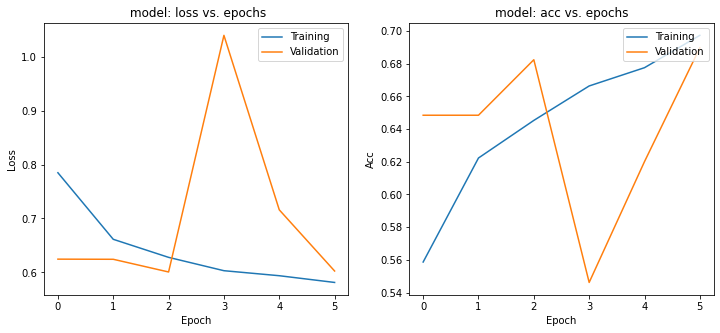

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(historycnn.history['loss'])
plt.plot(historycnn.history['val_loss'])
plt.title(' model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(historycnn.history['accuracy'])
plt.plot(historycnn.history['val_accuracy'])
plt.title('model: acc vs. epochs')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

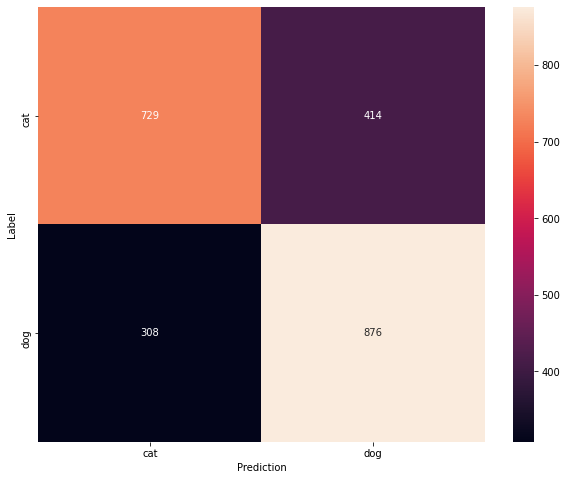

In [23]:
pred=[]
lab=[]
for ds, lb in data_test:
    pred.append(tf.math.argmax(modelcnn.predict(ds,verbose=0),axis=1))
    lab.append(lb)
confusion_mtx = tf.math.confusion_matrix(
    np.concatenate(lab),
    np.concatenate(pred),
    num_classes=len(label_names))
show_confusion_matrix(confusion_mtx, label_names)

(<matplotlib.image.AxesImage at 0x7fa73a3cfbe0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>)

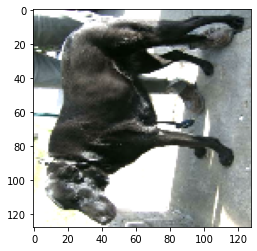

In [32]:
plt.imshow(ds[0]),lb[0]

In [33]:
successive_outputs = [layer.output for layer in modelcnn.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = modelcnn.input, outputs = successive_outputs)
successive_feature_maps = visualization_model.predict(tf.expand_dims(ds[0],axis=0))
layer_names = [layer.name for layer in modelcnn.layers]

1/1 [==============================] - 0s 159ms/step


(1, 128, 128, 16)
(1, 64, 64, 16)
(1, 64, 64, 32)
(1, 64, 64, 32)
(1, 32, 32, 32)
(1, 32, 32, 32)
(1, 32, 32, 32)
(1, 16, 16, 32)
(1, 8192)
(1, 8192)
(1, 128)
(1, 128)
(1, 128)
(1, 2)


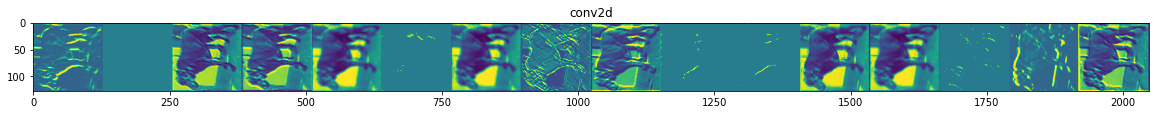

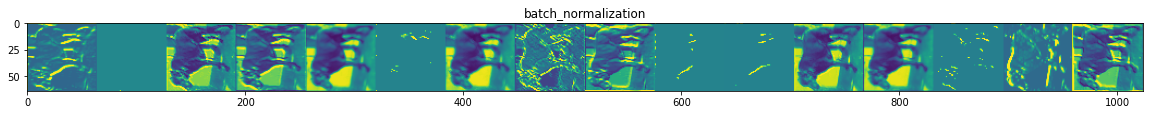

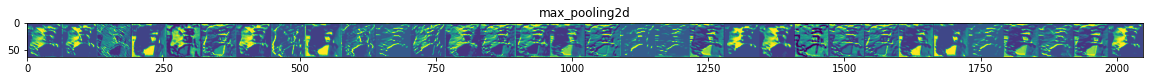

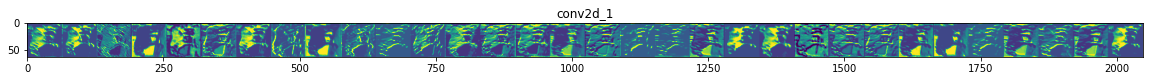

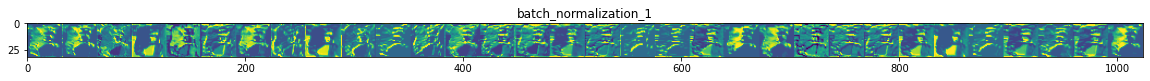

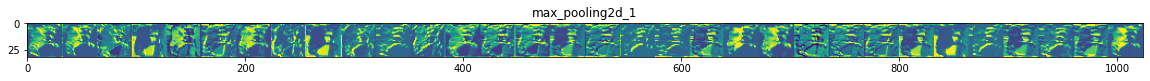

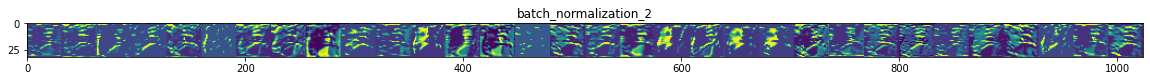

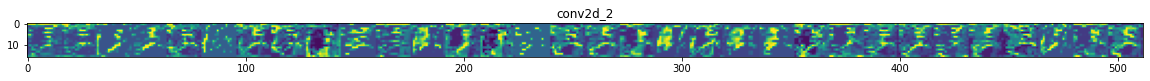

In [34]:


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 


In [35]:
#### transfer learning

model_tl= tf.keras.Model(inputs=modelcnn.input, outputs=modelcnn.layers[-6].output)
model_tl.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128 

In [36]:
model_tl.trainable=False
model_tl.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128 

In [39]:
my_model=tf.keras.Sequential([
    model_tl,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(2,activation='softmax')
    ])
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_5 (Functional)        (None, 8192)              15424     
                                                                 
 dense_6 (Dense)             (None, 32)                262176    
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 277,666
Trainable params: 262,242
Non-trainable params: 15,424
_________________________________________________________________


In [41]:
my_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

my_history= my_model.fit(
    data_train,
    epochs=6,
    validation_data=data_test,
    callbacks=callbacks,
    verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 1/6
931/931 [==============================] - 23s 24ms/step - loss: 1.6155 - accuracy: 0.6524 - val_loss: 0.6672 - val_accuracy: 0.6592 - lr: 9.0484e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 2/6
931/931 [==============================] - 24s 26ms/step - loss: 0.5440 - accuracy: 0.7341 - val_loss: 0.5869 - val_accuracy: 0.6687 - lr: 9.0484e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 3/6
931/931 [==============================] - 25s 27ms/step - loss: 0.5016 - accuracy: 0.7646 - val_loss: 0.5754 - val_accuracy: 0.7190 - lr: 9.0484e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 4/6
931/931 [==============================] - 29s 31ms/step - loss: 0.4724 - accuracy: 0.7713 - val_loss: 0.5704 - val_accuracy: 0.7237 - lr: 9.0484e-04

Epoch 5: LearningRateScheduler setting 

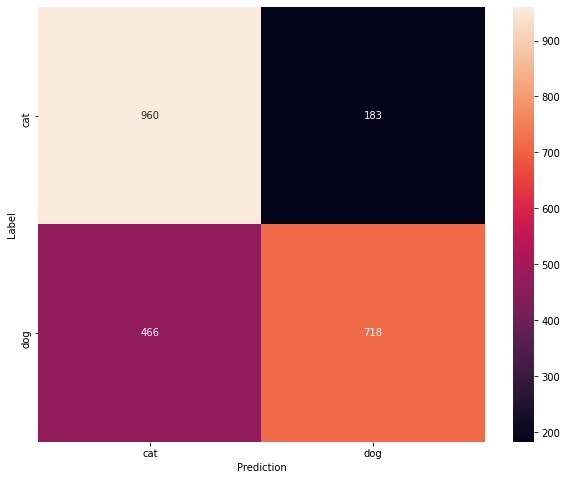

In [42]:
pred=[]
lab=[]
for ds, lb in data_test:
    pred.append(tf.math.argmax(my_model.predict(ds,verbose=0),axis=1))
    lab.append(lb)
confusion_mtx = tf.math.confusion_matrix(
    np.concatenate(lab),
    np.concatenate(pred),
    num_classes=len(label_names))
show_confusion_matrix(confusion_mtx, label_names)

In [44]:
#primer metodo!!
import tensorflow_hub as hub

https://tfhub.dev/

In [45]:
model_hub = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5")
])
model_hub.build([None, 224, 224, 3])

In [46]:
model_hub.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              25615849  
                                                                 
Total params: 25,615,849
Trainable params: 0
Non-trainable params: 25,615,849
_________________________________________________________________


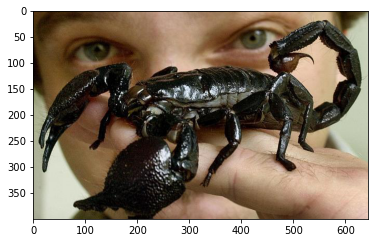

In [52]:
from PIL import Image
from numpy import asarray
from skimage.transform import resize
  
fig1 = Image.open('/home/javier/figura1_perro.jpg')
fig2 = Image.open('/home/javier/figura2_bus.jpeg')
fig3 = Image.open('/home/javier/fi.jpeg')
fig4 = Image.open('/home/javier/figura1_escorpion.jpg')
numpy1 = resize(asarray(fig1)/255.0,(224, 224, 3))
numpy2 = resize(asarray(fig2)/255.0,(224, 224, 3))
numpy3 = resize(asarray(fig3)/255.0,(224, 224, 3))
numpy4 = resize(asarray(fig4)/255.0,(224, 224, 3))
plt.imshow(fig4)



In [53]:
result1 = model_hub.predict(numpy1[np.newaxis, ...])
result2 = model_hub.predict(numpy2[np.newaxis, ...])
result3 = model_hub.predict(numpy3[np.newaxis, ...])
result4 = model_hub.predict(numpy4[np.newaxis, ...])



1/1 [==============================] - 0s 119ms/step


In [55]:
predicted_1 = tf.math.argmax(result1[0], axis=-1)
predicted_2 = tf.math.argmax(result2[0], axis=-1)
predicted_3 = tf.math.argmax(result3[0], axis=-1)
predicted_4 = tf.math.argmax(result4[0], axis=-1)

In [56]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())


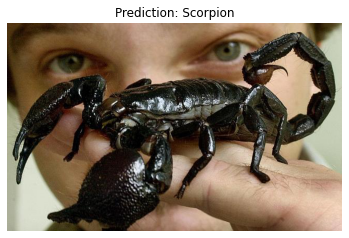

In [67]:
plt.imshow(fig4)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_4]
_ = plt.title("Prediction: " + predicted_class_name.title())



In [71]:
model_hubtf = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5",trainable=False)
])
model_hubtf.build([None, 224, 224, 3])

In [73]:
num_classes = len(imagenet_labels)

model_hub_train = tf.keras.Sequential([
    model_hubtf,
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(2)
])
model_hub_train.build([None, 224, 224, 3])
model_hub_train.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 1001)              25615849  
                                                                 
 dense_12 (Dense)            (None, 32)                32064     
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,648,243
Trainable params: 32,394
Non-trainable params: 25,615,849
_________________________________________________________________


In [74]:
model_hub_train.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [75]:
model_hub_train_history= model_hub_train.fit(
    data_train,
    epochs=6,
    validation_data=data_test,
    callbacks=callbacks,
    verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 1/6
931/931 [==============================] - 310s 328ms/step - loss: 2.6502 - accuracy: 0.5877 - val_loss: 2.6319 - val_accuracy: 0.5836 - lr: 9.0484e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 2/6
 12/931 [..............................] - ETA: 3:39 - loss: 3.1209 - accuracy: 0.5333

KeyboardInterrupt: 

https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [78]:
feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet',
                                                         pooling='max')

In [79]:
feature_extractor.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [81]:
feature_extractor.trainable = False
feature_extractor.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [97]:
inputs = tf.keras.Input(shape=(128, 128, 3))
x= tf.keras.layers.Resizing(224, 224)(inputs)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = feature_extractor(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs =Dense(10)(x)
model_train = tf.keras.Model(inputs, outputs)
model_train.summary()



Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_7   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_7 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0   

In [98]:
model_train.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [99]:
model_train_history= model_train.fit(
    data_train,
    epochs=6,
    validation_data=data_test,
    callbacks=callbacks,
    verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 1/6
 57/931 [>.............................] - ETA: 9:08 - loss: 7.9898 - accuracy: 0.4772

KeyboardInterrupt: 

In [100]:
for idx,layer in enumerate(feature_extractor.layers):
    print(idx,layer.trainable, layer.name)

0 False input_2
1 False conv1_pad
2 False conv1_conv
3 False conv1_bn
4 False conv1_relu
5 False pool1_pad
6 False pool1_pool
7 False conv2_block1_1_conv
8 False conv2_block1_1_bn
9 False conv2_block1_1_relu
10 False conv2_block1_2_conv
11 False conv2_block1_2_bn
12 False conv2_block1_2_relu
13 False conv2_block1_0_conv
14 False conv2_block1_3_conv
15 False conv2_block1_0_bn
16 False conv2_block1_3_bn
17 False conv2_block1_add
18 False conv2_block1_out
19 False conv2_block2_1_conv
20 False conv2_block2_1_bn
21 False conv2_block2_1_relu
22 False conv2_block2_2_conv
23 False conv2_block2_2_bn
24 False conv2_block2_2_relu
25 False conv2_block2_3_conv
26 False conv2_block2_3_bn
27 False conv2_block2_add
28 False conv2_block2_out
29 False conv2_block3_1_conv
30 False conv2_block3_1_bn
31 False conv2_block3_1_relu
32 False conv2_block3_2_conv
33 False conv2_block3_2_bn
34 False conv2_block3_2_relu
35 False conv2_block3_3_conv
36 False conv2_block3_3_bn
37 False conv2_block3_add
38 False conv

In [104]:
feature_extractor.trainable=True
for layer in feature_extractor.layers[:165]:
    layer.trainable=False

In [105]:
for idx,layer in enumerate(feature_extractor.layers):
    print(idx,layer.trainable, layer.name)

0 False input_2
1 False conv1_pad
2 False conv1_conv
3 False conv1_bn
4 False conv1_relu
5 False pool1_pad
6 False pool1_pool
7 False conv2_block1_1_conv
8 False conv2_block1_1_bn
9 False conv2_block1_1_relu
10 False conv2_block1_2_conv
11 False conv2_block1_2_bn
12 False conv2_block1_2_relu
13 False conv2_block1_0_conv
14 False conv2_block1_3_conv
15 False conv2_block1_0_bn
16 False conv2_block1_3_bn
17 False conv2_block1_add
18 False conv2_block1_out
19 False conv2_block2_1_conv
20 False conv2_block2_1_bn
21 False conv2_block2_1_relu
22 False conv2_block2_2_conv
23 False conv2_block2_2_bn
24 False conv2_block2_2_relu
25 False conv2_block2_3_conv
26 False conv2_block2_3_bn
27 False conv2_block2_add
28 False conv2_block2_out
29 False conv2_block3_1_conv
30 False conv2_block3_1_bn
31 False conv2_block3_1_relu
32 False conv2_block3_2_conv
33 False conv2_block3_2_bn
34 False conv2_block3_2_relu
35 False conv2_block3_3_conv
36 False conv2_block3_3_bn
37 False conv2_block3_add
38 False conv

In [106]:
inputs = tf.keras.Input(shape=(128, 128, 3))
x= tf.keras.layers.Resizing(224, 224)(inputs)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = feature_extractor(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs =Dense(10)(x)
model_train = tf.keras.Model(inputs, outputs)
model_train.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 resizing_3 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_9   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_9 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0  

In [107]:
model_train.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [108]:
model_train_history= model_train.fit(
    data_train,
    epochs=6,
    validation_data=data_test,
    callbacks=callbacks,
    verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 9.048374340636656e-05.
Epoch 1/6
 32/931 [>.............................] - ETA: 10:16 - loss: 7.5913 - accuracy: 0.0000e+00

KeyboardInterrupt: 